<a href="https://colab.research.google.com/github/payalgupta479/Handwriten_Digit_Recognition1/blob/main/Copy_of_Handwritten_digits_recognition_using_Convolutional_Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten digits recognition (using Convolutional Neural Network) -  by Akanksha Dube,Payal Gupta,Amruta Sutar**

Libraries used:tensorflow,matplotlib,seaborn,numpy,pandas,math,datetime.

In [27]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
!pip install tensorflow==2.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!pip install gradio --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import gradio as gr

In [31]:
import tensorflow as tf
#import tensorflowjs as tfjs
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import sys

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.10.11
Tensorflow version: 2.11.0
Keras version: 2.11.0


**Loading the Data**

*The training dataset consists of 60000 28x28px images of hand-written digits from 0 to 9.*

*The test dataset consists of 10000 28x28px images.* 

In [32]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [33]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [34]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


**Exploring the data**

It is a 28x28 matrix of integers (from 0 to 255). Each integer represents a color of a pixel.

In [35]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


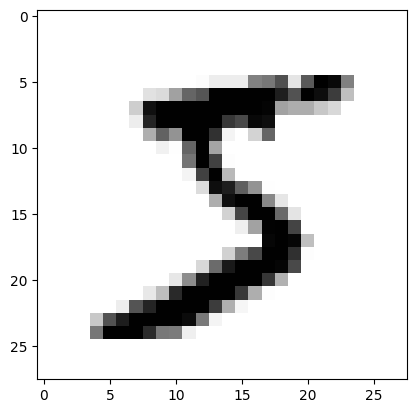

In [36]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

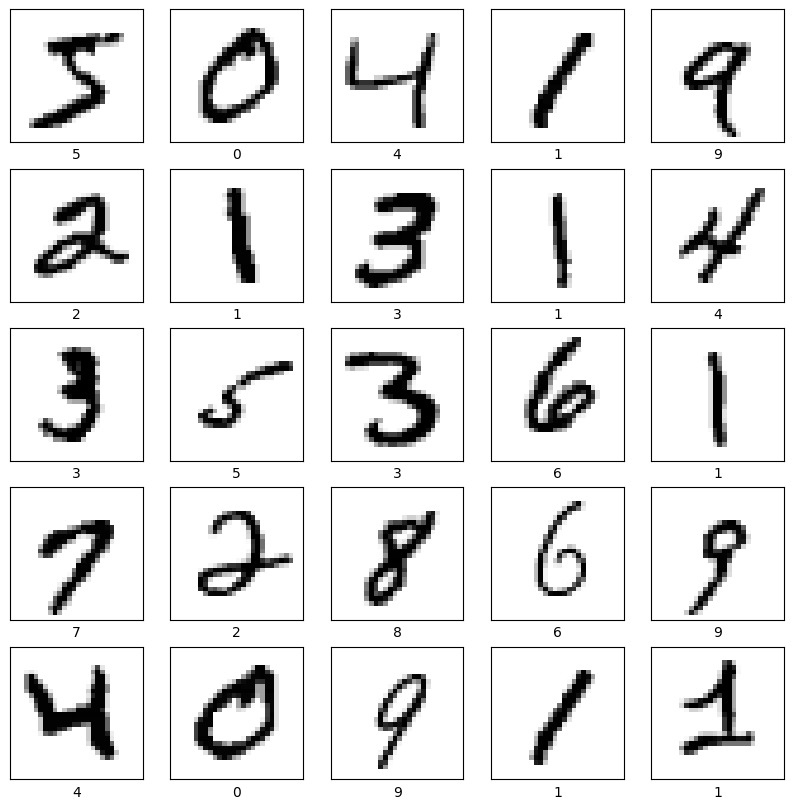

In [37]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

**Reshaping the data**

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. We need to reshape it to (28, 28, 1) shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [38]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [39]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


**Normalize the data**

Here we're just trying to move from values range of [0...255] to [0...1].

In [40]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [41]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model.

Then we will have two pairs of [Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable) layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer to convert multidimensional parameters to vector.

The las layer will be a [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In [ ]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2
))


))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [42]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

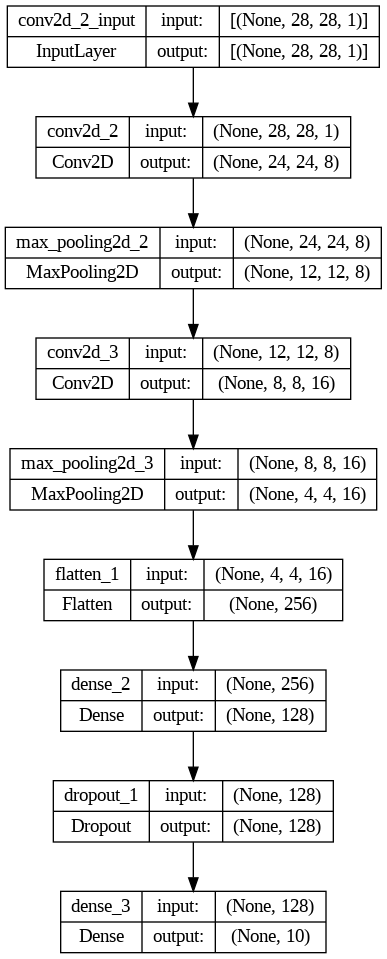

In [44]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [45]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [46]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 62s 32ms/step - loss: 0.2020 - accuracy: 0.9377 - val_loss: 0.0570 - val_accuracy: 0.9819
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0699 - accuracy: 0.9779 - val_loss: 0.0558 - val_accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0517 - accuracy: 0.9838 - val_loss: 0.0456 - val_accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0329 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0370 - val_accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0362 - val_accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0294 -

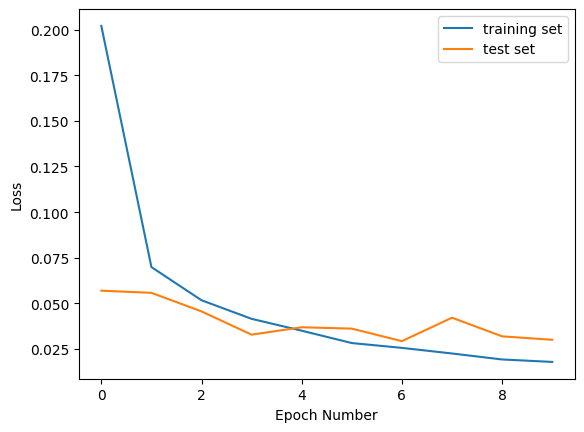

In [47]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

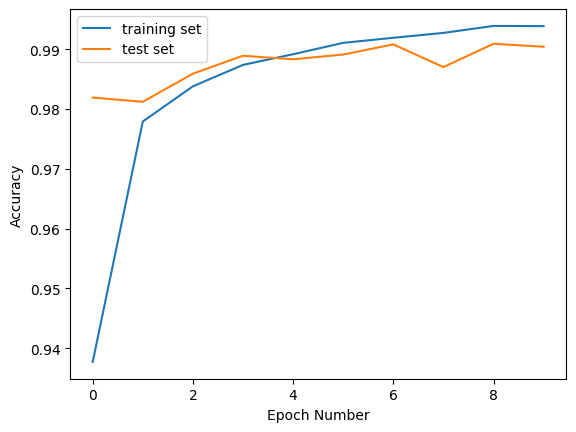

In [48]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

In [50]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [51]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.010250662453472614
Training accuracy:  0.9965500235557556


Test Set Accuracy

In [53]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [54]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.030093003064393997
Validation accuracy:  0.9904000163078308


Save the Model

In [55]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [56]:
loaded_model = tf.keras.models.load_model(model_name)

Checking Predictions

In [57]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 [==============================] - 2s 5ms/step


In [58]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [59]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,9.282325e-13,1.287640e-08,2.023739e-11,5.037287e-10,3.607830e-10,2.476536e-10,1.056628e-18,9.999999e-01,1.734316e-12,1.400590e-10
1,1.816078e-08,2.004487e-09,9.999999e-01,7.899824e-16,7.968380e-15,1.665858e-17,3.079825e-10,1.317924e-12,1.943260e-13,4.117897e-18
2,4.053974e-12,9.999999e-01,1.210049e-11,3.033628e-17,1.986665e-10,2.168947e-12,3.444952e-11,1.127594e-08,3.411343e-11,1.484601e-13
3,9.999999e-01,1.056577e-16,2.942923e-14,3.354908e-19,1.129157e-15,4.916451e-14,1.600554e-08,7.373755e-14,8.834774e-15,5.789113e-12
4,9.731915e-12,4.853199e-09,3.956911e-10,9.716947e-12,9.999861e-01,9.729112e-12,4.907958e-11,1.259133e-10,4.074368e-12,1.382774e-05
...,...,...,...,...,...,...,...,...,...,...
9995,1.169439e-12,1.723181e-12,9.999999e-01,2.959237e-13,3.957785e-19,8.044712e-21,6.262449e-16,5.545954e-10,1.415839e-12,1.969339e-19
9996,2.148223e-14,1.653785e-12,2.322615e-10,9.999998e-01,1.114853e-15,6.771155e-08,3.158316e-16,2.748660e-12,2.079002e-11,1.746522e-11
9997,1.535583e-21,9.396314e-09,4.066295e-16,3.870711e-17,9.999999e-01,1.389035e-15,1.917937e-12,1.161775e-13,3.262888e-09,2.935690e-11
9998,2.492127e-09,1.098472e-13,1.656385e-17,7.727667e-08,6.642200e-16,9.999997e-01,2.264486e-08,6.079467e-13,6.025181e-08,1.853797e-13


In [60]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [61]:
print(predictions[0])

7


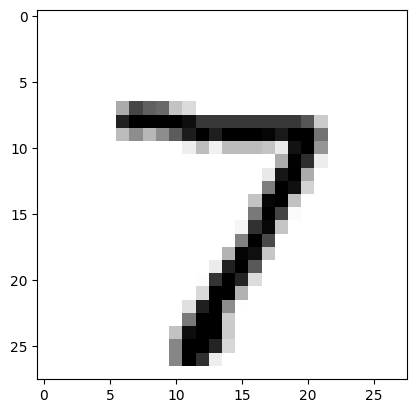

In [62]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

<ipython-input-63-d429469149ca>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


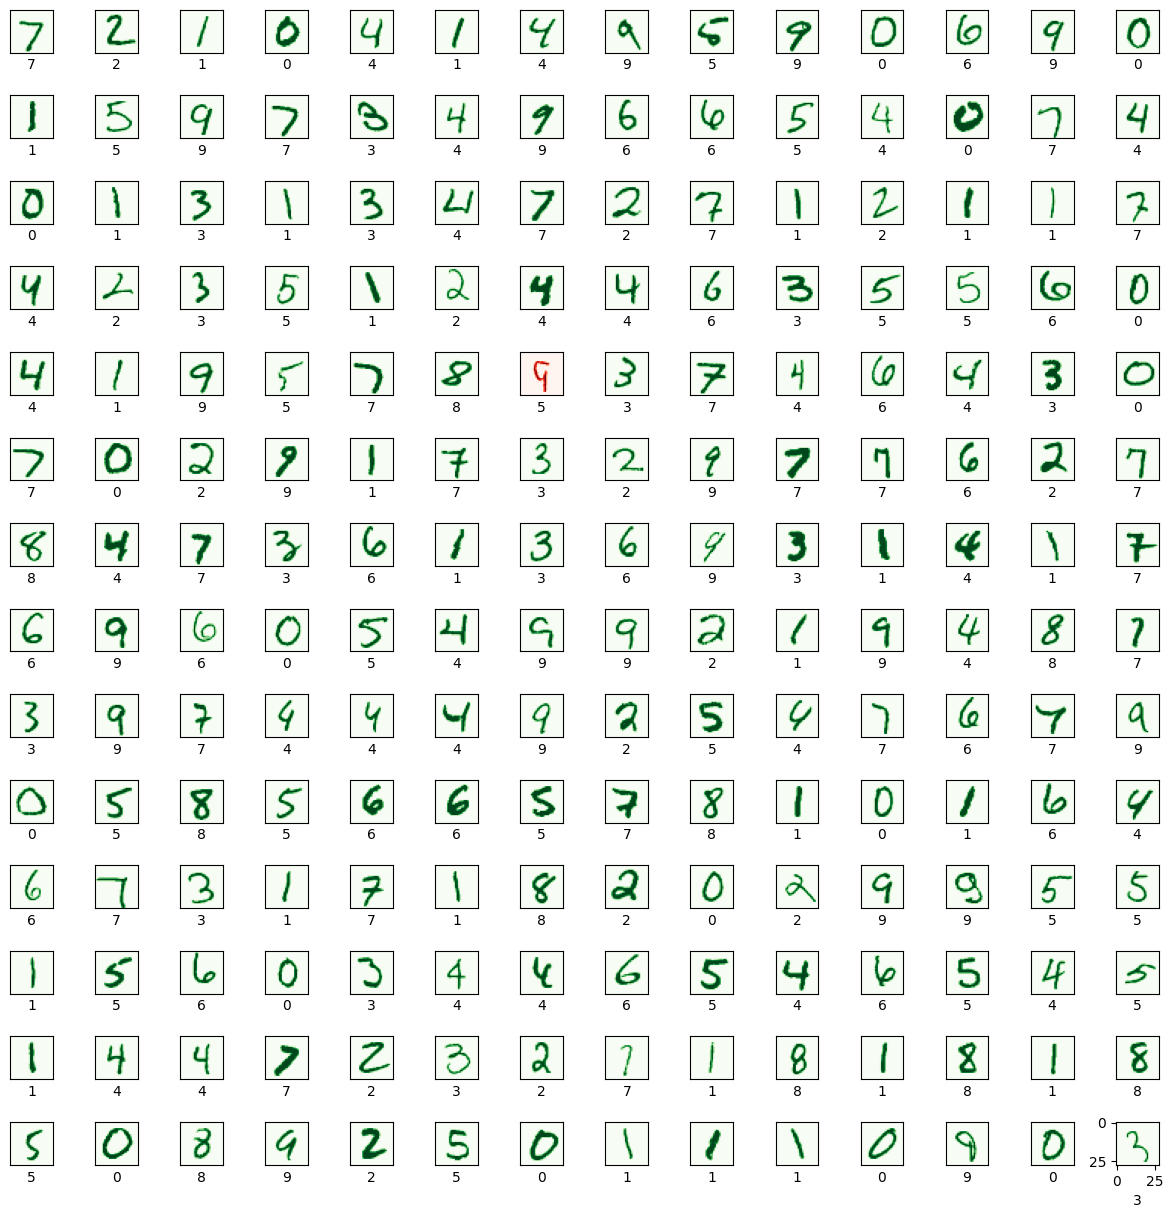

In [63]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

confusion matrix

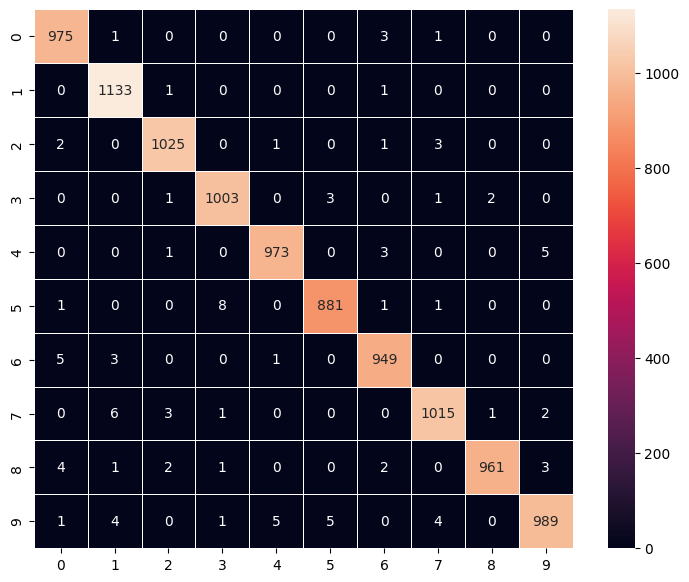

In [64]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [65]:
#tfjs.converters.save_keras_model(model,'models')

In [66]:
model = tf.keras.models.load_model('digits_recognition_mlp.h5')


In [67]:
def predict_digit(image):
    # Preprocess image
    image = np.array(image).reshape((1, 28, 28, 1)) / 255.0
    
    # Make prediction
    prediction = model.predict(image)[0]
    
    # Return prediction as dictionary
    return {str(i): float(prediction[i]) for i in range(10)}

In [68]:
inputs = gr.components.Image(shape=(28, 28))
outputs = gr.components.Label(num_top_classes=3)

In [69]:
iface = gr.Interface(fn=predict_digit, inputs="sketchpad", outputs="label", 
                     sketchpad_size=300,
                     title="Handwritten Digit Recognition", 
                     description="<b>Draw a digit between 0 and 9 and see if the model can recognize it!<b>")

/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'sketchpad_size': 300}
  warnings.warn(


In [72]:
iface.launch(share=True)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b4cec2a001663aeec9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [71]:
# define input and output interfaces
#def predict_digit(image):
    # preprocess image
#   image = np.array(image).reshape((1, 28, 28, 1)) / 255.0
    # make prediction
#   prediction = model.predict(image)[0]
    # return prediction as dictionary
#   return {str(i): float(prediction[i]) for i in range(10)}

In [ ]:
#inputs = gr.components.Image(shape=(28, 28))
#outputs = gr.components.Label(num_top_classes=3)

In [ ]:
#iface = gr.Interface(predict_digit, inputs="sketchpad", outputs="label")


In [ ]:
#iface.launch(share=True)